<h1>Coursera Course Dataset analysis</h1>
Kaggle dataset analysis and visualisation with Matplotlib & Seaborn, project by Greta Prekerienė


<h2>Introduction</h2>
Project dedicated to practice working with data from Kaggle, performing basic Explanatory Data Analysis(EDA), performing queries and filtering data using Pandas. Practice visualizing data with Matplotlib & Seaborn libraries. Objectives and requirements are provided in the README file.

__Structure of coding and analysis of this document__
1. Section 1. Preparing data
2. Section 2. Basic EDA
3. Section 3. Data modification

Preparing data section includes data loading using Pandas, checking missing values and duplicates.

In the end is summary.

<h3>Section 1. Preparing data</h3>

<h4>Load the data using Pandas</h4>
Importing csv, numpy and pandas libraries. Reading a csv file with Coursera Course Dataset from Kaggle https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset.
Improting matplotlib and seaborn for visualizing.
First 5 rows provided from data.

In [371]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = "Data_coursera_kaggle/coursera_data.csv"
df_original = pd.read_csv(csv_path, index_col=0)
df_original.head()


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


<h4>Data cleaning.</h4>Missing values, finding duplicate samples and features, handling outliers.


<h5>Missing values</h5>
No missing values found so no further actions are needed.

In [337]:
df_original.isnull().sum() # Missing values count

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

<h5>Duplicates</h5>
All rows doesn't have duplicates. No additional actions.

In [338]:
duplicates = df_original.duplicated()
sum_duplicates = duplicates.sum()
sum_duplicates = duplicates.size - duplicates.value_counts()[False]
print("Number of Duplicates: ", sum_duplicates)

Number of Duplicates:  0


<h5>Outliers</h5>
There is 1 numeric type column. Outliers values provided in code ouput below.
In regard this project scope and relatively small sample size outliers will remain in the data.

<Axes: title={'center': 'Course rating box-and-whisker plot'}>

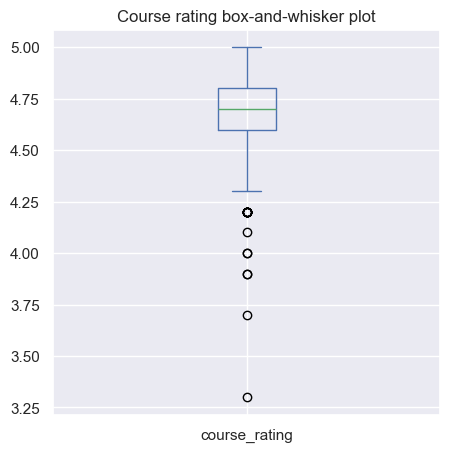

In [470]:
df_original[['course_rating']].plot(
    kind='box',
    title='Course rating box-and-whisker plot', 
    figsize= (5,5)
)

Box plot shows outliers for course ratings starting from rating of 3.3 almost to 4.1. This indicates overall higher rating of the courses.

In [340]:
from scipy import stats

def find_outliers(column, method='zscore', threshold=3):
  """
  This function detects outliers in a numerical column using a specified method.

  Args:
      column (pandas.Series): The numerical column to analyze.
      method (str, optional): The method for outlier detection. Defaults to 'zscore'.
          - 'zscore': Uses z-scores (standard deviations from the mean).
          - 'iqr': Uses Interquartile Range (IQR).
      threshold (float, optional): The threshold for outlier detection. Defaults to 3.
          - For z-scores, values with absolute value exceeding the threshold are considered outliers.
          - For IQR, values below Q1 - threshold * IQR or above Q3 + threshold * IQR are considered outliers.

  Returns:
      pandas.Series: A Series containing True for outliers and False for non-outliers.
  """
  if method == 'zscore':
    z_scores = stats.zscore(column)
    return np.abs(z_scores) > threshold
  elif method == 'iqr':
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    return (column < (q1 - threshold * iqr)) | (column > (q3 + threshold * iqr))
  else:
    raise ValueError("Invalid method. Choose 'zscore' or 'iqr'.")



numerical_columns = df_original.select_dtypes(include=['number'])

columns_with_outliers = []

for col in numerical_columns:
  # Detect outliers using z-scores
  outliers = find_outliers(df_original[col], method='zscore')

  # Track columns with outliers
  if outliers.any():
    columns_with_outliers.append(col)

  # Print results for the current column
  print(f"\nColumn: {col}")
  if outliers.any():
    print("Outliers detected:")
    print(df_original[col][outliers])  # Print rows with outliers in the current column
  else:
    print("No outliers detected.")

# Print summary of columns with outliers
if columns_with_outliers:
  print("\nSummary: Columns with Outliers:")
  for col in columns_with_outliers:
    print(col)
else:
  print("\nSummary: No outliers detected in any numerical columns.")


Column: course_rating
Outliers detected:
767    3.3
609    4.1
659    4.0
352    3.7
178    3.9
873    4.0
779    3.9
Name: course_rating, dtype: float64

Summary: Columns with Outliers:
course_rating


<h3>Section 2. Basic EDA</h3>

Shape returns dimensions of Dataframe. Dataset contains 891 rows or examples and 6 columns.

In [341]:
df_original.shape

(891, 6)

From info we can see that there are none missing values. We have only 1 numberic type column.

In [342]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


Dataset has 6 columns related with coursera courses.

In [343]:
df_original.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')

Unique values from dataset. Columns course_Certificate_type and course_difficulty might have a categorical values due to low amount of unique values.

In [344]:
df_original.nunique()

course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

In the dataset there is trend to less proffesional and specialized courses. Graph Course certificate type shows amount of courses by certificate.

[Text(0, 0, '582'), Text(0, 0, '297'), Text(0, 0, '12')]

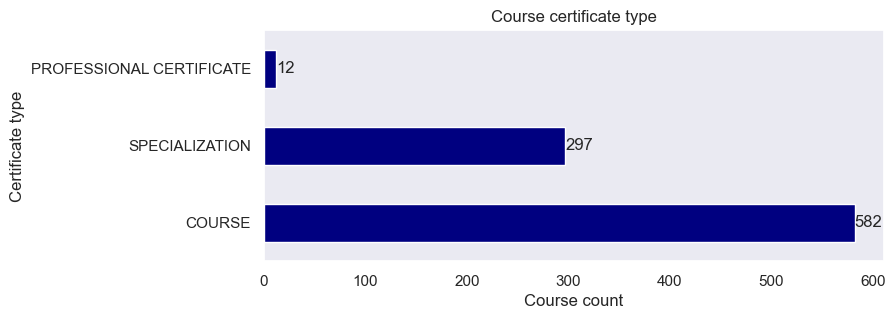

In [390]:
course_certificate_type_plot = df_original['course_Certificate_type'].value_counts().plot(
    kind='barh', figsize=(8,3),
    title = 'Course certificate type',
    ylabel = 'Certificate type',
    xlabel = 'Course count', 
    grid = False,
    color = 'navy'
            )

course_certificate_type_plot.bar_label(auk.containers[0])

Value counts of course difficulty in the dataset.

In [346]:
df_original['course_difficulty'].value_counts()


course_difficulty
Beginner        487
Intermediate    198
Mixed           187
Advanced         19
Name: count, dtype: int64

Text(0, 0.5, 'Course count')

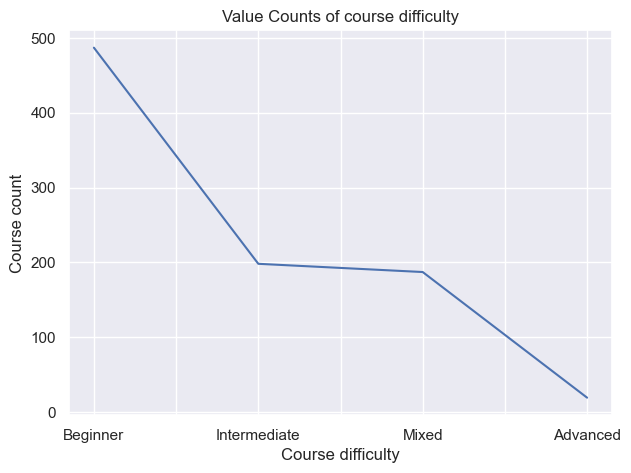

In [392]:
df_original['course_difficulty'].value_counts().plot(kind='line', figsize=(7,5))
plt.title('Value Counts of course difficulty')
plt.xlabel('Course difficulty')
plt.ylabel('Course count')

In the graph Value Counts of course difficulty we can see more complex course is the lower amount is available.

<h3>Section 3. Data modification</h3>
After initial data exploration we can see that we have only 1 numerical column out of six. Not the best case for feature comparisson. Course_students_enrolled look like a numerical values with added k for thousands and m for millions. We will add columns to the original data to convert enrolled students into numerical values. Columns course_Certificate_type and course_difficulty will be changed to categorical type.

In [410]:
df_original.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


<h4>Course_students_enrolled column convert to numerical values</h4>

In [394]:
df_original.course_students_enrolled.unique()

array(['5.3k', '17k', '130k', '91k', '320k', '39k', '350k', '2.4k', '61k',
       '12k', '4k', '13k', '11k', '27k', '110k', '6.6k', '540k', '22k',
       '2.9k', '80k', '9.9k', '23k', '9.2k', '78k', '190k', '35k', '29k',
       '14k', '21k', '94k', '69k', '40k', '220k', '150k', '18k', '270k',
       '7.9k', '30k', '36k', '20k', '8.1k', '120k', '71k', '63k', '42k',
       '480k', '97k', '200k', '180k', '4.2k', '310k', '3.9k', '79k',
       '31k', '15k', '10k', '66k', '33k', '56k', '7.3k', '9.7k', '210k',
       '28k', '6.5k', '55k', '2.3k', '8.8k', '88k', '1.9k', '68k', '1.6k',
       '9.5k', '57k', '26k', '84k', '95k', '5.8k', '24k', '67k', '280k',
       '38k', '77k', '510k', '89k', '48k', '160k', '32k', '340k', '82k',
       '790k', '19k', '51k', '4.8k', '37k', '43k', '6.4k', '49k', '240k',
       '46k', '7.8k', '75k', '81k', '140k', '5.5k', '99k', '100k', '3k',
       '830k', '740k', '60k', '96k', '690k', '44k', '4.5k', '8.2k', '16k',
       '300k', '8k', '41k', '54k', '9k', '380k',

Course students enrolled column has letter k or m in every column. Creating a dictionary with replace method, all k and m will be replaced by numbers. New dataset df will be created by using method copy() from the df_original.

In [404]:
df_original['course_students_enrolled'].str.count('k|m').sum()

891

In [412]:
df = df_original.copy()
replace_dict = {'[kK]': '*1e3', '[mM]': '*1e6'}
students_amount = df_original['course_students_enrolled'].replace(replace_dict, regex=True).map(pd.eval)
df['course_students_enrolled'] = students_amount
df['course_students_enrolled']

134      5300.0
743     17000.0
874    130000.0
413     91000.0
635    320000.0
         ...   
236     52000.0
883     21000.0
545     30000.0
875      9800.0
163     38000.0
Name: course_students_enrolled, Length: 891, dtype: float64

Updated dataset df now has 2 numerical columns.

In [413]:
df.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled    float64
dtype: object

2 dataset numerical values have basic statistics metrics below in the table. From the table we can see that for the course_rating has range of (3.3-4.68), small standard deviation.
Course_students_enrolled has range from 1500 to more than 3 million. Standard deviation has relatively high value.

In [414]:
df.describe().style.format(precision=2, thousands=' ')

,course_rating,course_students_enrolled
count,891.00,891.00
mean,4.68,90 552.08
std,0.16,181 936.45
min,3.30,1 500.00
25%,4.60,17 500.00
50%,4.70,42 000.00
75%,4.80,99 500.00
max,5.00,3 200 000.00


<h4>Columns convert to categorical</h4>
Columns course_Certificate_type and course_difficulty will be changed to categorical type. Using astype() method.
Method info output shows changed data type, from object to category.

In [415]:
df = df.astype({'course_Certificate_type' : 'category', 'course_difficulty': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   course_title              891 non-null    object  
 1   course_organization       891 non-null    object  
 2   course_Certificate_type   891 non-null    category
 3   course_rating             891 non-null    float64 
 4   course_difficulty         891 non-null    category
 5   course_students_enrolled  891 non-null    float64 
dtypes: category(2), float64(2), object(2)
memory usage: 69.2+ KB


There are no correlation between course rating and students enrolled. There are no linear releations between these two features.

In [416]:
numeric_columns = df.select_dtypes(include=['number'])
matrix = numeric_columns.corr()
matrix[matrix<1].style.format(na_rep='')

,course_rating,course_students_enrolled
course_rating,,0.071090
course_students_enrolled,0.071090,


Dataset has 1 new numeric column. Check for outliers must be performed again. Due to sample size we will keep row in the dataset. Also it is not clear if popular courses with high number of students are not relevant for analysis. Further statistic significant needs to be explored. Outliers provided in the box plot below.

<Axes: title={'center': 'Amount of enrolled students box-and-whisker plot'}, ylabel='Students amount'>

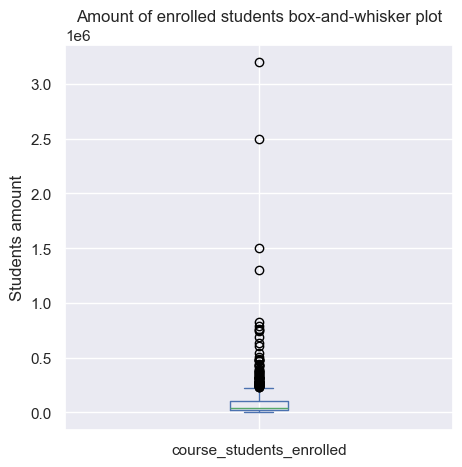

In [429]:
df[['course_students_enrolled']].plot(
    kind='box',
    title='Amount of enrolled students box-and-whisker plot', 
    figsize= (5,5),
    ylabel = 'Students amount'
)

From the boxplot we can there are few outliers marked with circles. Main part of the box is in the lowe part of the graph.

<h4>Adding language column</h4>
Coursera dataset has courses in different languages. Using library langdetect from course title and organization title joined string new column witn indicated possible language added. Also there is a column with percenteges of detection.
In the beggining potencial countries showed signs of subgrouping courses by specific speaking language around the world, but detection library langdetect seems to have issues if the string contains abbreviations. 
Using combined value of organization and course name increased accuracy for non english language. Unfortunetaly with more correctly detected foreign languages, more foreign languages had selected to be english. Foreign country accuracy increased with english accuracy decreasing.

In [430]:
df['course_organization_with_title'] = df['course_organization'].str.cat(df['course_title'], sep=' - ')
from langdetect import detect, lang_detect_exception, detect_langs

def check_lang(val):
    try:
        lang = detect(str(val))
    except lang_detect_exception.LangDetectException:
        lang = 'UNKNOWN'
    return lang

def check_language_percentage(val):
    try:
        lang_percentage = detect_langs(str(val))
    except lang_detect_exception.LangDetectException:
        lang_percentage = 'UNKNOWN'
    return lang_percentage

df['language'] = df['course_organization_with_title'].apply(lambda x: check_lang(x))
df['language_perc'] = df['course_organization_with_title'].apply(lambda x:check_language_percentage(x))
df.head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_organization_with_title,language,language_perc
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0,(ISC)² - (ISC)² Systems Security Certified Pra...,en,[en:0.9999965828828276]
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0,University of Pennsylvania - A Crash Course in...,en,[en:0.9999971940816939]
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0,Johns Hopkins University - A Crash Course in D...,en,[en:0.9999973144880134]
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0,Yale University - A Law Student's Toolkit,en,[en:0.9999951818937007]
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0,Indian School of Business - A Life of Happines...,en,[en:0.9999968024390382]
661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39000.0,University at Buffalo - ADHD: Everyday Strateg...,en,[en:0.9999966463716701]
54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350000.0,deeplearning.ai - AI For Everyone,en,[en:0.9999924934770221]
488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2400.0,deeplearning.ai - AI For Medical Treatment,en,"[en:0.8571392681153864, ro:0.14286035168376135]"
58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61000.0,IBM - AI Foundations for Everyone,en,[en:0.9999955962916423]
129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12000.0,deeplearning.ai - AI for Medical Diagnosis,en,"[en:0.7142840401423532, ro:0.28571466037931675]"


In total 13 different languages detected in the data set. Some contain special characters and 'kirilica'

In [273]:
print('Unique language detected in the dataset')
df.language.unique()

Unique language detected in the dataset


array(['en', 'de', 'es', 'bg', 'no', 'ca', 'nl', 'fr', 'it', 'pt', 'da',
       'tl', 'ru'], dtype=object)

Example of courses in spanish language.

In [274]:
filter_for_printing = ['course_title', 'course_organization','language', 'language_perc']
df[df['language']=='es'][filter_for_printing]

,course_title,course_organization,language,language_perc
838,Actualización en el manejo del paciente con di...,Universidad Nacional Autónoma de México,es,[es:0.9999960262140768]
514,Anticorrupción: Introducción a conceptos y per...,Universidad Nacional Autónoma de México,es,[es:0.9999968193378795]
512,Aprender,Universidad Nacional Autónoma de México,es,[es:0.9999964610994033]
551,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,es,"[es:0.8571398273090964, en:0.14285744494320538]"
877,Aspectos básicos de la planificación y la gest...,University of Virginia,es,[es:0.9999963997289029]
782,Atención Primaria en Salud: El desafío de las ...,Pontificia Universidad Católica de Chile,es,[es:0.9999944786981323]
498,Big Data – Introducción al uso práctico de dat...,Universitat Autònoma de Barcelona,es,[es:0.9999956301102008]
107,Camino a la Excelencia en Gestión de Proyectos,Pontificia Universidad Católica de Chile,es,[es:0.9999953852012158]
197,Claves de la Dirección de Empresas,IESE Business School,es,[es:0.9999977176833584]
300,Contabilidad para no contadores,Universidad Nacional Autónoma de México,es,[es:0.9999951738842949]


<h4>Questions</h4>

**Which course has the highest rating?**
Two course have highest rating of 5 provided below in a table. Worth to mention that both has relatively low number of students enrolled(maximum higher than 3 million student per course).

In [302]:
columns_to_print = ['course_title', 'course_rating', 'course_organization', 'course_students_enrolled']
df[df['course_rating'] == 5][columns_to_print].sort_values(by='course_rating', ascending=False)

,course_title,course_rating,course_organization,course_students_enrolled
789,El Abogado del Futuro: Legaltech y la Transfor...,5.0,Universidad Austral,1500.0
401,Infectious Disease Modelling,5.0,Imperial College London,1600.0


**Which course has the lowest rating?**

How to create a Website in a Weekend has lowest course rating on the dataset.

In [303]:
min_rating_index = df['course_rating'].idxmin()
lowest_rating = df.loc[min_rating_index, columns_to_print]
print("Lowest rating:")
lowest_rating

Lowest rating:


course_title                How To Create a Website in a Weekend! (Project...
course_rating                                                             3.3
course_organization                          The State University of New York
course_students_enrolled                                             140000.0
Name: 767, dtype: object

**Which organization provides most courses?**

University of Pennsylvania offers 59 courses on coursera. It has highest number of courses.

In [431]:
df['course_organization'].value_counts().iloc[:1]

course_organization
University of Pennsylvania    59
Name: count, dtype: int64

**Which are top5 organizations by enrolled students amount?**

In [447]:
print('Top5 organizations by enrolled students:')
df.groupby('course_organization')['course_students_enrolled'].sum().sort_values( ascending=False).head()


Top5 organizations by enrolled students:


course_organization
University of Michigan              7437700.0
University of Pennsylvania          5501300.0
Stanford University                 4854000.0
University of California, Irvine    4326000.0
Johns Hopkins University            4298900.0
Name: course_students_enrolled, dtype: float64

**How many students enrolled in courses?**

Additional data could provide insights about students who enrolled in more than one course. Currently there are more than 80 million enrolled students. Possible part of those students has more than 1 course on Coursera.

In [450]:
df['course_students_enrolled'].sum()

80681900.0

In [368]:
df.head()

,course_title,course_organization,student_amount,course_students_enrolled,course_organization_with_title,language,language_perc
0,Course A,Org1,100,480000.0,Org1 - Course A,en,"[en:0.7142813585143161, fr:0.1428612354636958,..."
1,Course B,Org2,200,310000.0,Org2 - Course B,en,"[fr:0.4275433709306724, en:0.2867423449310085,..."
2,Course C,Org1,150,2500000.0,Org1 - Course C,en,"[en:0.5714269088974187, fr:0.4285723109733872]"
3,Course D,Org2,80,1500000.0,Org2 - Course D,de,"[de:0.4285711326775741, nl:0.2857151780101519,..."
4,Course E,Org1,50,350000.0,Org1 - Course E,de,"[fr:0.712558123082009, en:0.14458567235876552,..."


Low number of professional certificate courses doesn't appear on the graph. From the graph rating compared to difficulty distributed equally.

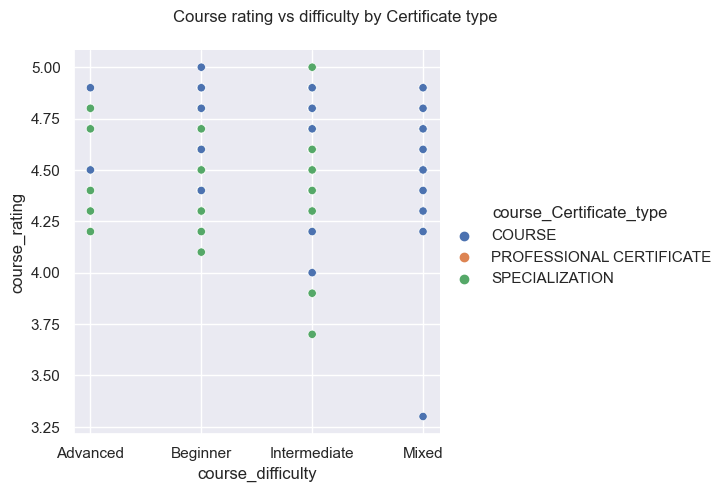

In [467]:
sns.set_theme()

rating_difficulty_vs_type_graph = sns.relplot(
    data = df,
    y = 'course_rating', x='course_difficulty', 
    hue = 'course_Certificate_type'
   )
rating_difficulty_vs_type_graph.fig.suptitle('Course rating vs difficulty by Certificate type', fontsize=12)
rating_difficulty_vs_type_graph.fig.subplots_adjust(top=0.9)

In comparisson of course rating vs Certificate type by difficulty we can see that professional certificate courses are for beginner. More variaty of different dificulty levels is in course Certificate type.

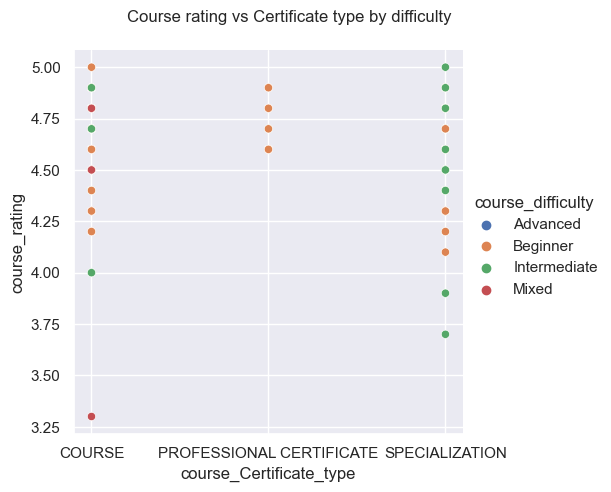

In [468]:
course_type_graph = sns.relplot(
    data = df,
    x = 'course_Certificate_type', y='course_rating', 
    hue = 'course_difficulty')
course_type_graph.fig.suptitle('Course rating vs Certificate type by difficulty', fontsize=12)
course_type_graph.fig.subplots_adjust(top=0.9)

<h2>Summary</h2>

__Insights__
1. Data set has 6 features and 891 rows.
2. Data set contains numerical, categorical and object data value types.
3. Most courses are providing University of Pensilvania. 59 courses in total.
4. Most amount of students 3.2 million are enrolled in course 'Machine Learning' By Standorf University.
5. Two highest rated courses has lowest amount of enlisted students.
6. Course amount decrease with increasing course difficulty.
7. Courses have 13 different languages.
8. Two numerical features course_rating and course_students_enllisted do not have linear relations. Correlations are close to zero.
9. There are only 12 professional sertificate courses out of 891.
10. Dataset covers more than 80 millions students enrolled. Although it's not clear how many stydents have more than 1 course.



__Suggestions for improvements__
1. Bigger data sample. More features to explore.
2. Research trends with foreign languages, foreign universities.
3. Include graphical materials for visualisation world wide coursera courses data. Example, spanish speaking reagions compare with amount of french language enlisted students.
